In [2]:
# Cell 1: Imports & Data Load
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure model and output folders exist
os.makedirs('models', exist_ok=True)
os.makedirs('outputs/plots', exist_ok=True)

# Load data
df = pd.read_csv('data/heart.csv')


In [3]:
# Cell 2: Train-Test Split & Feature Scaling
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [4]:
# Cell 3: Model Training (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the model
joblib.dump(rf_model, 'models/rf_heart_model.pkl')


['models/rf_heart_model.pkl']

In [5]:
# Cell 4: Predictions & Evaluation
y_pred = rf_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



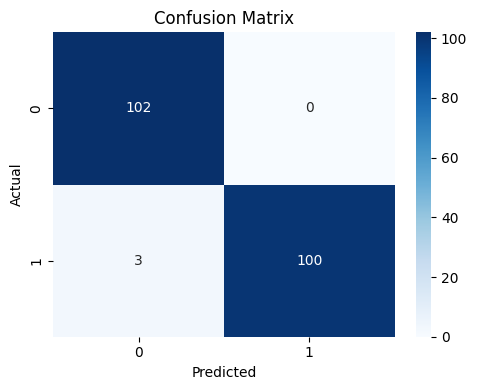

In [6]:
# Cell 5: Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('outputs/plots/confusion_matrix.png')
plt.show()


C:\Users\Yaseen2112\AppData\Local\Temp\ipykernel_18760\4108008183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette='viridis')


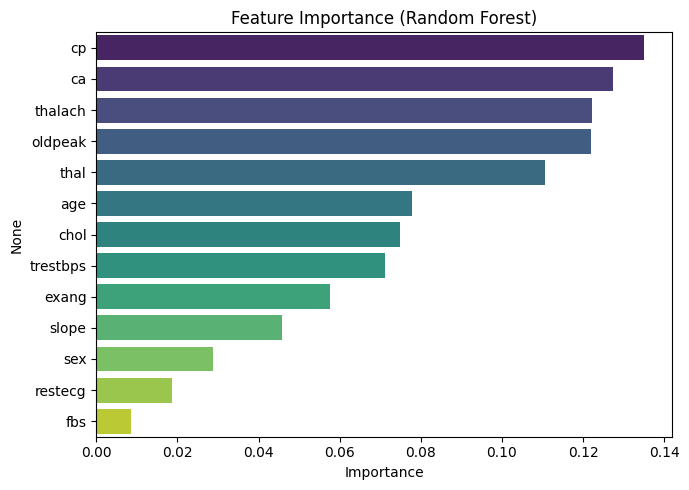

In [7]:
# Cell 6: Feature Importance Plot
import numpy as np

feature_importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(7,5))
sns.barplot(x=feature_importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('outputs/plots/feature_importance.png')
plt.show()


In [8]:
X_test_scaled = scaler.transform(X_test)
model = joblib.load('models/rf_heart_model.pkl')
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Model accuracy: 98.54%


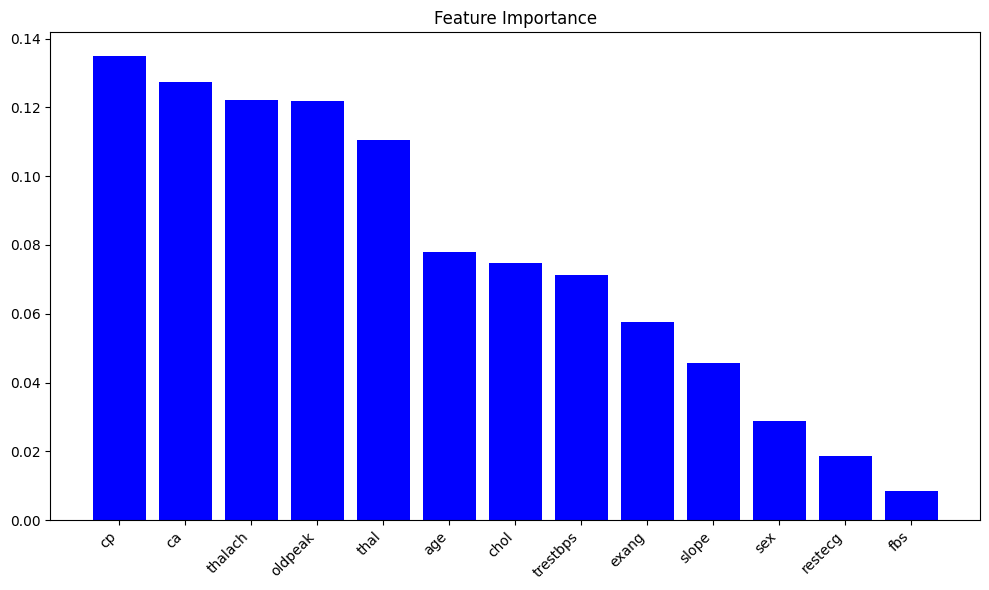

In [10]:
import matplotlib.pyplot as plt
import numpy as np

feat_names = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], color="b", align="center")
plt.xticks(range(len(importances)), [feat_names[i] for i in indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()
